# EM Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

## Generate Data

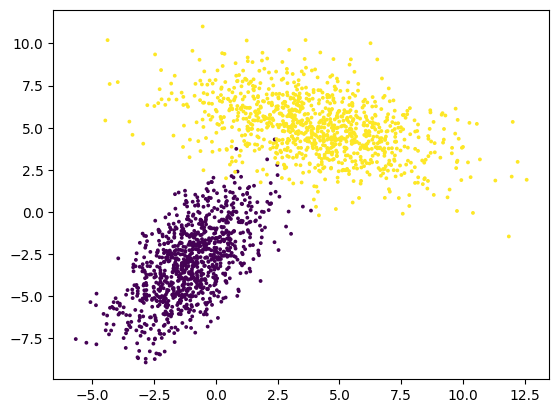

In [2]:
num_points = 1000

mean_1 = [-1, -3]
cov_1 = [[2, 2], [2, 5]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [4, 5]
cov_2 = [[7, -2], [-2, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

## Silhouette score

In [3]:
for i in range(2, 5):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.6309942586802498
For n_clusters = 3  silhouette average: 0.5238862311939424
For n_clusters = 4  silhouette average: 0.41728435529863994


## Covariance type

In [4]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)

means 
[[-1.03341325 -3.04306811]
 [ 4.01646313  5.03119954]]
covariances 
[[[ 1.95703206  1.91149774]
  [ 1.91149774  5.07375159]]

 [[ 7.07136416 -2.07351597]
  [-2.07351597  3.22380991]]]


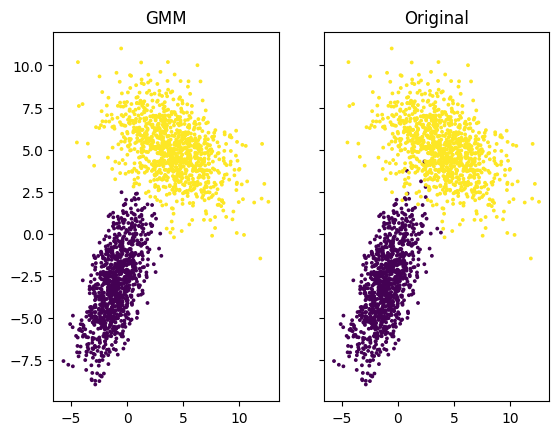

In [5]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

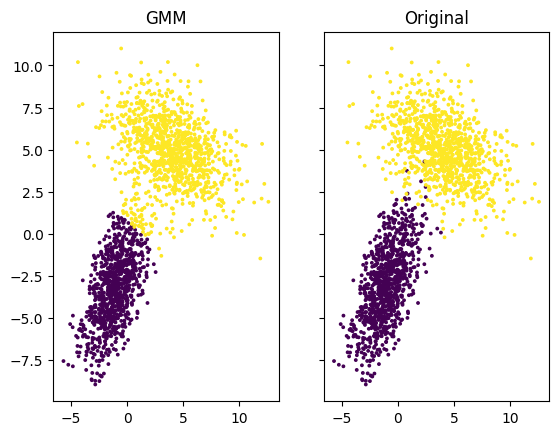

In [6]:
GMM = GaussianMixture(n_components=2, covariance_type='spherical')
GMM.fit(X)

labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)